# Data analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from functions import find_neighboring_directories
from make_json import parameter_names

Neighboring files:
Removed JSON file: DECAY_FACTOR/parameters_1.json
Removed JSON file: DECAY_FACTOR/parameters_2.2.json
Removed JSON file: DECAY_FACTOR/parameters_2.json
Removed JSON file: DECAY_FACTOR/parameters_2.5.json
Removed JSON file: DECAY_FACTOR/parameters_3.json
Removed JSON file: BG_NOISE/parameters_0.1.json
Removed JSON file: BG_NOISE/parameters_0.3.json
Removed JSON file: BG_NOISE/parameters_0.4.json
Removed JSON file: BG_NOISE/parameters_0.05.json
Removed JSON file: BG_NOISE/parameters_0.2.json
Removed JSON file: BG_NOISE/parameters_0.5.json
Directory: DECAY_FACTOR
Modified parameter 'params/DECAY_FACTOR' to 1 and saved to DECAY_FACTOR/parameters_1.json
Modified parameter 'params/DECAY_FACTOR' to 2 and saved to DECAY_FACTOR/parameters_2.json
Modified parameter 'params/DECAY_FACTOR' to 2.2 and saved to DECAY_FACTOR/parameters_2.2.json
Modified parameter 'params/DECAY_FACTOR' to 2.5 and saved to DECAY_FACTOR/parameters_2.5.json
Modified parameter 'params/DECAY_FACTOR' to 3 

In [2]:
neighbouring_directories = find_neighboring_directories()
print(neighbouring_directories)
# import .npy files from neighbouring directories
data = {}
parameter_values = {}
for directory in neighbouring_directories:
    print(directory)
    for filename in os.listdir(directory):
        if filename.endswith(".npy") and filename.startswith("overall"):
            filepath = os.path.join(directory, filename)
            data[directory] = np.load(filepath)
        if filename.endswith(".npy") and filename.startswith("parameter_values"):
            filepath = os.path.join(directory, filename)
            parameter_values[directory] = np.load(filepath)

print(data.keys())
print(parameter_values)

['DECAY_FACTOR', 'BG_NOISE']
DECAY_FACTOR
BG_NOISE
dict_keys(['DECAY_FACTOR', 'BG_NOISE'])
{'DECAY_FACTOR': array([1. , 2.2, 2. , 2.5, 3. ]), 'BG_NOISE': array([0.1 , 0.3 , 0.4 , 0.05, 0.2 , 0.5 ])}


In [3]:
wanted_directories = ['DECAY_FACTOR', 'BG_NOISE']

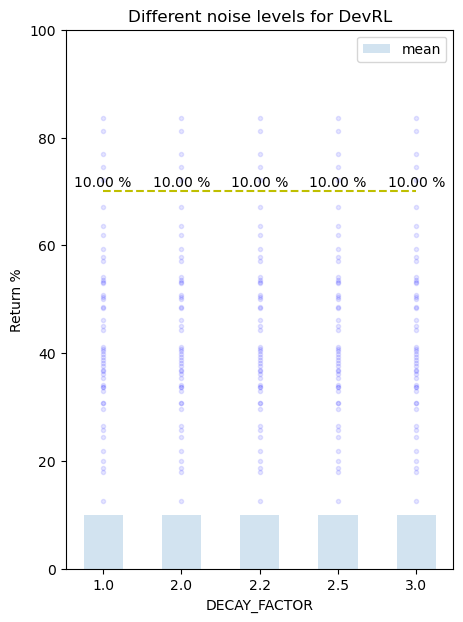

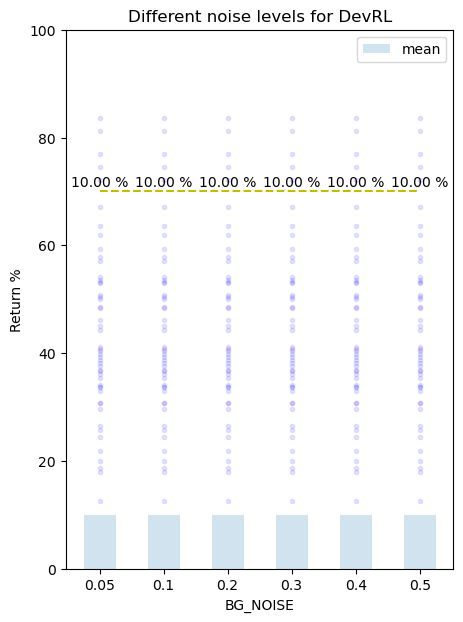

In [4]:
def plot_returns(data, key):
  for index, directory in enumerate(neighbouring_directories):
    if directory in data.keys():
      if directory in wanted_directories:
        param = directory
        returns = 100 * data[directory]
        parameter_values_sorted = sorted(parameter_values[directory])  # Sort parameter values
        sorted_indices = np.argsort(parameter_values[directory])  # Get sorting indices

        # Arrange returns based on sorted parameter values
        returns = returns[:, sorted_indices]

        n_values = len(parameter_values_sorted)
        above_threshold = np.zeros(n_values)
        for i in range(n_values):
          above_threshold[i] = np.sum(returns[:, i] > 70)

        above_threshold /= returns.shape[0]
        plt.figure(figsize=(5,7))
        means = np.mean(returns, axis=0)
        std = np.std(returns, axis=0)
        # Use plt.bar for means with error bars for std
        plt.bar(range(n_values), 100*above_threshold, label='mean', alpha=0.2, width=0.5)
        for i in range(n_values):
            plt.plot(i * np.ones_like(returns[:, i]), returns[:, i], '.', alpha = 0.1, color='b')
        plt.ylim(0, 100)
        for i in range(n_values):
            plt.text(i, 71, f"{100*above_threshold[i]:.2f} %", ha='center')
        plt.hlines(70, 0, n_values - 1, colors='y', linestyles='dashed')
        plt.xticks(np.arange(n_values, step=1), labels=parameter_values_sorted)
        plt.title(f'Different noise levels for DevRL')
        plt.xlabel(param)
        plt.ylabel('Return %')
        plt.legend()
        plt.show()

# sort parameter_values ascending and the sort the returns in the same way
plot_returns(data, parameter_names)